---

## Part I: Data representations

## Part II: Geometric Interpretation

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo

## Part I. Data representations


1. What are scalars, vectors, matrices, tensors
2. What is the rank, the axis, the shape of a tensor
3. Real examples of data tensors
4. What is a (mini-)batch of data
5. Tensor operations: arithmetic, slicing, broadcasting, reshaping, element-wise vs dot/matmul ops


---

# 2.2 Data representations for neural networks

- #### [Numerical dojo!](https://drive.google.com/file/d/1IPCbxDB4k33GG1i-Md85KMhzdFqe-NWt/view?usp=sharing) (Lab 1)
- #### [Accompanying quiz](https://drive.google.com/file/d/1xJ-A7PG0pU5S_gTuH2RmuEqTq6orLI-3/view?usp=sharing)

### Overview

- 0 dimensional: **scalars**: plain numbers;

- 1 dimensional: **vectors**:  arrays (in Python: lists/tuples);

- 2 dimensional: **matrices**: multi-dimensional arrays → NumPy/TF;

- above: **tensors**: generalisation of matrices!

##### Note

The dimension of a mathematical vector is the **number of elements**.  
Tensor dimension is the **number of axes**.

<!-- ![tf shapes 1](images/tf/tf-shape-1.png) -->
<img style="" src="https://raw.githubusercontent.com/jchwenger/AI/main/2-building-blocks/images/tf/tf-shape-1.png">

<small>Source: [TensorFlow Introduction to Tensors](https://www.tensorflow.org/guide/tensor)</small>

<!-- ![tf shapes 2](images/tf/tf-shape-2.png) -->
<img style="" src="https://raw.githubusercontent.com/jchwenger/AI/main/2-building-blocks/images/tf/tf-shape-2.png">

<small>Source: [TensorFlow Introduction to Tensors](https://www.tensorflow.org/guide/tensor)</small>

<!-- ![tf shapes 3](images/tf/tf-shape-3.png) -->
<img style="" src="https://raw.githubusercontent.com/jchwenger/AI/main/2-building-blocks/images/tf/tf-shape-3.png">

<small>Source: [TensorFlow Introduction to Tensors](https://www.tensorflow.org/guide/tensor)</small>

In [2]:
x = np.array(93)
print(f"{x}, shape: {x.shape}, rank: {x.ndim}, {x.size} elements") # rank: 0
print()                                                            # the shape is an empty array!

93, shape: (), rank: 0, 1 elements



In [3]:
x = np.arange(3)                                
print(f"{x}, shape: {x.shape}, rank: {x.ndim}, {x.size} elements") # rank: 1
print()                                                            # shape with tuple syntax: (3,)

[0 1 2], shape: (3,), rank: 1, 3 elements



In [4]:
x = np.arange(6).reshape((2,3))                 
print(f"{x}, shape: {x.shape}, rank: {x.ndim}, {x.size} elements") # rank: 2
print()

[[0 1 2]
 [3 4 5]], shape: (2, 3), rank: 2, 6 elements



In [5]:
x = np.arange(12).reshape((2,2,3))
print(f"{x}, shape: {x.shape}, rank: {x.ndim}, {x.size} elements") # rank: 3

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]], shape: (2, 2, 3), rank: 3, 12 elements


In [4]:
# Now in TensorFlow!
x = tf.constant(93)                           # .size not included as a method by default in TF
print(f"{x}, shape: {x.shape}, rank: {x.ndim}, {tf.size(x)} elements") # rank: 0
print()                                                                # the shape is an empty array!

93, shape: (), rank: 0, 1 elements



In [7]:
x = tf.range(3)                                
print(f"{x}, shape: {x.shape}, rank: {x.ndim}, {tf.size(x)} elements") # rank: 1
print()                                                                # shape with tuple syntax: (3,)

[0 1 2], shape: (3,), rank: 1, 3 elements



In [8]:
x = tf.reshape(tf.range(6), (2,3)) # .reshape not included as a method by default in TF         
print(f"{x}, shape: {x.shape}, rank: {x.ndim}, {tf.size(x)} elements") # rank: 2
print()

[[0 1 2]
 [3 4 5]], shape: (2, 3), rank: 2, 6 elements



In [9]:
x = tf.reshape(tf.range(12), (2,2,3))
print(f"{x}, shape: {x.shape}, rank: {x.ndim}, {tf.size(x)} elements") # rank: 3

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]], shape: (2, 2, 3), rank: 3, 12 elements


A table of comparison between mathematics and programming:

|Array |  Tensor | Maths | 
|:-----|:--------|:------| 
| 0D | rank 0 | scalar |
| 1D | rank 1 | vector |
| 2D | rank 2 | matrix |
| 3D | rank 3 | - |

---

## 2.2.5 Key attributes

- **Axis** = each of the dimension of the tensor;

- **Rank** = **dimension** = number of axes (and indices needed to retrieve elements);

- **Shape** = a description of the dimensions (size of each axis);

- **Type** = the data type of the contained data – `float32`, `uint8`...

##### Beware!

The NumPy and TensorFlow APIs are quite similar, with yet small differences here and there, leading to confusion.

In [3]:
print("Beware!")
print()

x = np.arange(12).reshape((2,2,3))
print(f"The default NumPy type: {x.dtype}")
print()

x = tf.reshape(tf.range(12), (2,2,3))
print(f"The default TensorFlow type: {x.dtype}")

Beware!

The default NumPy type: int64

The default TensorFlow type: <dtype: 'int32'>


Another table for remembering these terms:

|                        |        |
|-----------------------:|:-------|
| multidimensional array | tensor |
| dimension              | axis   |
| number of dimensions   | rank  
| length | number of elements in a 1D array/along a tensor axis |
| size | total number of elements (= rows * cols, for a matrix) |
| shape | lengths of each axis |

---

## 2.2.6 Manipulating tensors in NumPy (slicing)


Data frames are pulled from tensors by an operation known as **slicing**.

This is one of the things you cannot do in plain Python (you'd need loops and they are **slow**)!

##### Note

The current notebook has more programming examples you can have a look at, and which are skipped in this presentation mode.

In [10]:
# a rank 3 tensor
x = np.array([[[1, 2], 
               [3, 4]],
              
              [[5, 6], 
               [7, 8]],
              
              [[9, 10], 
               [11, 12]]])

print(x)

[[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]]


In [12]:
print(x[0])       # first element of the first axis

[[1 2]
 [3 4]]


In [13]:
print(x[0, 0])    # first row of the above

[1 2]


In [14]:
print(x[0, 0, 0]) # first element of the above

1


In [9]:
x = np.arange(12).reshape((3,2,2))
print(x)

[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]]


In [10]:
               # for each of the blocks, the first row
print(x[:, 0]) # ':' means "everything in this axis/dimension"

[[0 1]
 [4 5]
 [8 9]]


In [11]:
# for each of the blocks, the first column
# (for each block, for each column, the first element)
print(x[:, :, 0])

[[ 0  2]
 [ 4  6]
 [ 8 10]]


In [18]:
print(x[..., 0])  # same as above: '...' means: "fill in the rest"

[[ 0  2]
 [ 4  6]
 [ 8 10]]


---

## 2.2.7 The notion of data batches

Slicing is particularly present when preparing data.

Datasets are rarely processed in one go, it's intractable.

Instead, data is broken up into **mini-batches**:

- `train_images[:128]` a mini-batch of the first 128 images;

- `train_images[128:256]` the second mini-batch;

- `train_images[128 * n, 128 * (n + 1)]` the $n+1$'th mini-batch.

Slicing MNIST image tensors about the first axis selects contiguous images

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("'[60'000 images, width, height]'")
print("shape", train_images.shape)  # each axis & number of elements
print("rank:", train_images.ndim)   # rank = ndim = len(shape)
print("dtype:", train_images.dtype) # data type

'[60'000 images, width, height]'
shape (60000, 28, 28)
rank: 3
dtype: uint8


In [3]:
my_slice = train_images[10:20]   # select images 10 through to image 19
print(my_slice.shape)

(10, 28, 28)


### Slicing can happen *inside* the data

Imagine we wish to extract the middle 14 by 14 sub-image of every test image. Easy with slicing!

`7:-7` from element 7 **up to, but not including**, element 21 (= 28 - 7).

 
0, ..., 6,|7, ..., 20|, 21, ..., 27

In [6]:
# extract the middle 14 x 14 subimages from all test images
                 # slicing width, height
my_slice = train_images[:, 7:-7, 7:-7] # : on its own means 'everything'
my_slice.shape

(60000, 14, 14)

---

## 2.2.8 Real-world examples of data tensors

Let's look at some examples of real data tensors.

### Rank 2

Say we collected data on a population – for example, postcode, age, income.

The samples axis, the first axis, is each person surveyed and for each person we collect a vector of information, and the second axis is the data taken as a whole.

|  Data  | Rank | Shape     | Example    |
|---:|:---:|:---:|:----|
| vector | 2 | `(num_samples,num_features)` | demographics of a population - (postcode, age, income,...) for each person |

### Rank 3: time series, sequences (text/music)

Example of time series data: a data-set of weather readings.

A series of measurements – precipitation, temperature, etc. – at ten minutes intervals is collected for each day or sample.

|  Data  | Rank | Shape     | Example    |
|---:|:---:|:---:|:----|
| timeseries or sequence| 3 | `(num_samples,num_timesteps,num_features)` | daily weather features at ten minute intervals – (precipitation, temperature, humidity) for each time for each day |

### Rank 4: colour images

A colour image data-set is an example of rank 4 information.

An RGB vector resides at each pixel. The samples are individual images.

|  Data  | Rank | Shape     | Example    |
|---:|:---:|:---:|:----|
| image | 4 | `(num_samples,width,height,channels)` | 10,000 colour 256 x 256 colour images – a (256, 256, 3) colour map for each image|

##### Note

In some formats (PyTorch) you encounter  `(num_samples,channels,width,height)` instead! 💀

### Rank 5: video

About as high as you will ever meet.

The samples are videos: a video is a time series of frames and each frame is a 2D colour image. 

|  Data  | Rank | Shape     | Example    |
|---:|:---:|:---:|:----|
| video | 5 | `(num_samples,num_frames,width,height,channels)` | video – a (256, 256, 3) colour map for each frame of each video|

---

# 2.3 The gear of neural networks: Tensor operations

- Element-wise operations

- Broadcasting

- Tensor product

- Reshaping

---

## 2.3.1 Element-wise operations

Element-wise means: per-element operation. 

- Shapes must be **the same**;  
- **Or** compatible so that unequal axes can be **broadcast**!

Element-wise addition:

\begin{eqnarray}
\left(\begin{array}{c} 3 \\ 4 \end{array} \right)
+ \left( \begin{array}{c} 8 \\ 9 \end{array} \right)
= \left( \begin{array}{c} 11 \\ 13 \end{array} \right)
\end{eqnarray}

Hadamard product (point-wise multiplication):

\begin{eqnarray}
\left(\begin{array}{c} 3 \\ 4 \end{array} \right)
\odot \left( \begin{array}{c} 8 \\ 9 \end{array} \right)
= \left( \begin{array}{c} 24 \\ 36 \end{array} \right)
\end{eqnarray}

In [ ]:
x = np.array([3, 4])
y = np.array([8, 9])
print(x + y)

[11 13]


Element-wise function application: the function is applied to each element.

\begin{eqnarray}
  f\left( \begin{array}{c} -2 \\ 3 \end{array} \right)
  = \left( \begin{array}{c} f(-2) \\ f(3) \end{array} \right)
\end{eqnarray}


For instance, the `ReLU` activation: 

$$
\begin{eqnarray}
  \texttt{relu}\left( \begin{array}{c} -2 \\ 3 \end{array} \right)
   = \left( \begin{array}{c} \texttt{relu}(-2) \\ \texttt{relu}(3) \end{array} \right)
   = \left( \begin{array}{c} 0 \\ 3 \end{array} \right)
\end{eqnarray}
$$

In [2]:
# simple definition of a relu function for rank 1 tensors
def relu(x):
    assert len(x.shape) == 1
    y = x.copy()
    for i in range(x.shape[0]):
        y[i] = max(y[i], 0.)
    return y

In [3]:
x = np.array([-2, 3])
print(relu(x))
print(tf.nn.relu(x))

[0 3]
tf.Tensor([0 3], shape=(2,), dtype=int64)


### Important: *element-wise* stands in opposition to the *tensor product*, coming in a minute. 

---

## 2.3.2 Broadcasting

### General broadcasting rules:

1. Tensor shapes are compared right to left: **right-align the axes**;
2. If needed, **add empty dimensions** (1s) to the left so that the **ranks** are equal.
3. a. Dimensions are compatible if they are **equal** or **one of them is 1**;  
   b. The axis with dimension 1 is **copied** ("stretched", "broadcast") to match the other.

<!-- ![Numpy broadcasting 1](images/tf/np_broadcasting_1.png) -->
<img style="" src="https://raw.githubusercontent.com/jchwenger/AI/main/2-building-blocks/images/tf/np_broadcasting_1.png">

<small>Source: [NumPy Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)</small>

<!-- ![Numpy broadcasting 2](images/tf/np_broadcasting_2.png) -->
<img style="" src="https://raw.githubusercontent.com/jchwenger/AI/main/2-building-blocks/images/tf/np_broadcasting_2.png">

<small>Source: [NumPy Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)</small>

This does not work, why? Because you first **align the dimension to the right**: `(4,3)` and `(4,) → (1,4)`!

<!-- ![Numpy broadcasting 3](images/tf/np_broadcasting_3.png) -->
<img style="" src="https://raw.githubusercontent.com/jchwenger/AI/main/2-building-blocks/images/tf/np_broadcasting_3.png">

<small>Source: [NumPy Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)</small>

Double broadcasting: `(4,1)` and `(3,) → (1,3)`

<!-- ![Numpy broadcasting 4](images/tf/np_broadcasting_4.png) -->
<img style="" src="https://raw.githubusercontent.com/jchwenger/AI/main/2-building-blocks/images/tf/np_broadcasting_4.png">

<small>Source: [NumPy Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)</small>

<!-- ![Sasha Rush broadcasting rules](images/tf/srush-broadcasting.png) -->
<img style="" src="https://raw.githubusercontent.com/jchwenger/AI/main/2-building-blocks/images/tf/srush-broadcasting.png">

<small>Source: [Sasha Rush, Twitter](https://twitter.com/srush_nlp/status/1516781757596680194?t=RwVp5kUWPvHG-e42wo0ryw&s=19)</small>

##### Beware!

This is an extremely useful functionality, but *sometimes* that's not what you want!

As a rule of thumb, **you cannot be too careful** about your shapes and tensor operations.

**It takes practice.**

What better for this than the [Numerical dojo](https://drive.google.com/file/d/1IPCbxDB4k33GG1i-Md85KMhzdFqe-NWt/view?usp=sharing) and [Accompanying quiz](https://drive.google.com/file/d/1xJ-A7PG0pU5S_gTuH2RmuEqTq6orLI-3/view?usp=sharing)?

---

## 2.3.3 Tensor product

The dot operation is the tensor analogue of the dot product.

- between vectors, the familiar dot or scalar product:

\begin{eqnarray}
\left( \begin{array}{c} 2 & 3 \end{array} \right)
\cdot 
\left( \begin{array}{c}  -1  \\ 2  \end{array} \right) =
4
\end{eqnarray}

In [32]:
x = np.array([2,3])
y = np.array([-1,2])
print(x.dot(y))
print(tf.reduce_sum(x*y)) 

4
tf.Tensor(4, shape=(), dtype=int64)


- between a matrix and a vector:

\begin{eqnarray}
\left( \begin{array}{cc} 2 & 3  \\ 4 & 5  \end{array} \right)
\cdot 
\left( \begin{array}{c}  -1  \\ 2  \end{array} \right) =
\left( \begin{array}{c}  4  \\ 6  \end{array} \right)
\end{eqnarray}

In [36]:
x = np.array([[2,3],[4,5]])
y = np.array([-1,2])
print(x.dot(y))
print(x @ tf.reshape(y, (-1,1))) # turn y into a column vector

[4 6]
tf.Tensor(
[[4]
 [6]], shape=(2, 1), dtype=int64)


- between matrices: \( $(m \times n)\cdot (n \times k) = (m \times k)$ **inner dimensions must match!**)

\begin{eqnarray}
\left( \begin{array}{cc} 2 & 3  \\ 4 & 5  \end{array} \right)
\cdot 
\left( \begin{array}{cc}  -1  & 2 \\ 2 & -3  \end{array} \right) =
\left( \begin{array}{cc}  4 & -5  \\ 6 & -7  \end{array} \right)
\end{eqnarray}

In [33]:
x = np.array([[2,3],[4,5]])
y = np.array([[-1,2], [2, -3]])
print(x.dot(y))
print(x @ y)

[[ 4 -5]
 [ 6 -7]]
[[ 4 -5]
 [ 6 -7]]


### For example

The first layer of our MNIST network performed `relu(dot(w, x) + b)`.

Suppose `w` is a (512, 784) rank 2 tensor , `x` is a (784, ) rank 1 tensor and `b` is (512,). 

The result of `dot(w, x)` is a (512, ) tensor.

Element `i` of `dot(w, x)` is:

\begin{align*}
(w \cdot x)_i &= \sum_{j=0}^{783} w_{ij}x_j \\
i &= 0, 1,\ldots, 511
\end{align*}

The result of `dot(w, x)` is added element-wise to `b` (they have the same shape) and `relu` is applied to each element.

The layer transformation `relu(dot(w, x) + b)` is a composition of elementary tensor operations.  

---

## 2.3.4 Tensor reshaping

As we have seen, tensors elements can be redistributed in an operation known as **reshaping**.

For instance, the original `(60000, 28, 28)` MNIST images were flattened to `(60000, 28*28)`:

In [7]:
train_images_reshaped = train_images.reshape((60000, 28 * 28))
print(f"train_images shape: {train_images.shape}, after reshape: {train_images_reshaped.shape}")

train_images shape: (60000, 28, 28), after reshape: (60000, 784)


**Transposition** is another possibility.

Transposition flips rows and columns along the main diagonal.

Used all the time to make tensor dimensions agree for the tensor product!

<!-- <img style="height: 500px; float:right" src="images/matrix-transpose.wiki.gif"> -->
<img style="height: 500px; float:right" src="https://raw.githubusercontent.com/jchwenger/AI/main/2-building-blocks/images/matrix-transpose.wiki.gif">


<small style="position: absolute; bottom:0; right:0">[Transpose, Wikipedia](https://en.wikipedia.org/wiki/Transpose)</small>  

In [6]:
x = np.arange(6).reshape((2,3))
print(x)
print()
print(x.T) # same as x.transpose()
print()

x = tf.reshape(tf.range(6), (2,3))
print(x)
print()
print(tf.transpose(x)) # as before, TF has functional equivalents
                       # no x.T in TF!

[[0 1 2]
 [3 4 5]]

[[0 3]
 [1 4]
 [2 5]]

tf.Tensor(
[[0 1 2]
 [3 4 5]], shape=(2, 3), dtype=int32)

tf.Tensor(
[[0 3]
 [1 4]
 [2 5]], shape=(3, 2), dtype=int32)


### Part I. Recap

1. What are scalars, vectors, matrices, tensors  
2. What is the rank, the axis, the shape of a tensor  
3. Real examples of data tensors  
4. What is a (mini-)batch of data  
5. Tensor operations: arithmetic, slicing, broadcasting, reshaping, element-wise vs dot/matmul ops  

##### Practice Makes Perfect!

---

# Part II

## 2.3.5 Geometric interpretation of tensor operations

Neural networks are of course transforming data into useful representations, but one way I like to think about that
is that they **transform space itself** to achieve their goals.

Indeed, numerical tensor elements can be interpreted not only as:

- coordinates in a (high-dimensional) real space;  
- but also as **linear transformations** in this space.

A function is linear if:
1. $f(x + y) = f(x) + f(y) \quad \text{(additivity)}$ 
2. $f(ax) = af(x) \quad \text{(homogeneity)}$ 

Otherwise it is nonlinear.

Intuitively, this is equivalent to:
- **squishing** or **stretching**;  
- **performing rotations** or a **shear**;  
- (all **straight lines** remain straight);  
- (and the **origin remains fixed**). 

For example, a rotation:

<!-- ![Chollet geometric rotation](images/geometric/chollet.geometric.2.png) -->
<img style="" src="https://raw.githubusercontent.com/jchwenger/AI/main/2-building-blocks/images/geometric/chollet.geometric.2.png">

<small>DLWP, p.45</small>

<!-- \begin{align*}
w\cdot x = \begin{pmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{pmatrix}
\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
=
\begin{pmatrix} x_1 \cos \theta - x_2 \sin \theta \\ x_1 \sin \theta + y_2 \cos \theta \end{pmatrix}
\end{align*} -->

Or this:

<!-- ![Chollet geometric rotation](images/geometric/chollet.geometric.3.png) -->
<img style="" src="https://raw.githubusercontent.com/jchwenger/AI/main/2-building-blocks/images/geometric/chollet.geometric.3.png">

<small>DLWP, p.46</small>

<!-- \begin{align*}
w\cdot x = \begin{pmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{pmatrix}
\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
=
\begin{pmatrix} x_1 \cos \theta - x_2 \sin \theta \\ x_1 \sin \theta + y_2 \cos \theta \end{pmatrix}
\end{align*} -->

$w \cdot x$ is a linear transformation.

If you add a bias, $wx + b$, this is no longer linear, but **affine**: the origin does not stay where it is.

##### Note

In the deep learning world, *often* you will only hear **linear** to describe these transformations, even if **affine** is the rigorous mathematical concept.

<!-- ![Chollet geometric rotation](images/geometric/chollet.geometric.1.png) -->
<img style="" src="https://github.com/jchwenger/AI/blob/main/2-building-blocks/images/geometric/chollet.geometric.1.png?raw=true">

<small>DLWP, p.46</small>

<!-- ![Chollet geometric rotation](images/geometric/chollet.geometric.4.png) -->
<img style="" src="https://github.com/jchwenger/AI/blob/main/2-building-blocks/images/geometric/chollet.geometric.4.png?raw=true">

<small>DLWP, p.46</small>

Each layer in a neural network performs a non-linear data transformation: 

$$f(w\cdot x + b)$$

where $f$ is the **activation function** and $w \cdot x + b$ is an affine transformation.

<!-- ![Chollet geometric rotation](images/geometric/chollet.geometric.5.png) -->
<img style="" src="https://github.com/jchwenger/AI/blob/main/2-building-blocks/images/geometric/chollet.geometric.5.png?raw=true">

<small>DLWP, p.47</small>

The network as a whole, in a series of linear, affine and non-linear transformations  implements a *complex transformation on a high dimensional geometric object* (the data).

The overall function of the network is **composed of a series of simpler transformations**.

The network unfolds complex data into something simple and meaningful (a representation where you can easily separate your classes...). Chollet's image: unfolding a paper sheet, crumpled into a 1000 dimensional ball.

<!-- ![Chollet uncrumpling](images/geometric/chollet.uncrumpling.png) -->
<img style="" src="https://github.com/jchwenger/AI/blob/main/2-building-blocks/images/geometric/chollet.uncrumpling.png?raw=true">

<small>DLWP, p.47</small>

Here's one of the rare good visualisations of what is happening under the hood!

This network is *uncrumpling* the data (**three spirals: three classes**) in successive layers.

(I let you sole judge as to whether the data is **simpler** at the start or the end...)

At the end, the net is able to **separate the space into regions with only one class** (classification).

This is of course a very simple network with two neurons in each layer (only 2D transforms)!

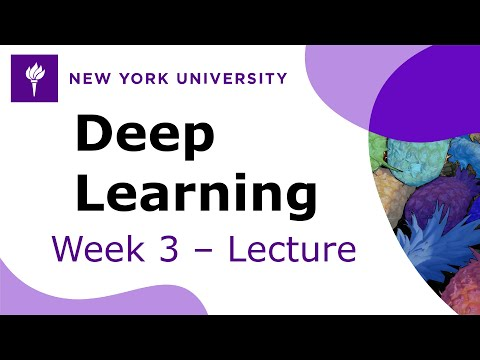

In [2]:
YouTubeVideo("FW5gFiJb-ig", width=853, height=480, start=180) # NYU Canziani Week 3, until 4.21

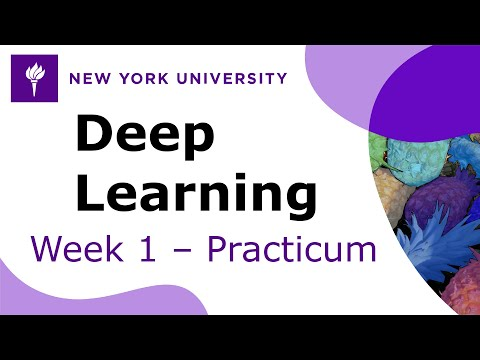

In [3]:
YouTubeVideo("5_qrxVq1kvc", width=853, height=480, start=831) # NYU Canziani Week 1 Practicum, until 16'10

### A simple example: a square

We will consider a layer transformation of a low dimensional object – a tensor holding four 2D points.

Each point is a corner of a square. 

In [4]:
import numpy as np
a = np.array([1, -1])
b = np.array([1, 1])
c = np.array([-1, 1])
d = np.array([-1, -1])
x = np.array([a, b, c, d])
print(x, '\t', x.shape)

[[ 1 -1]
 [ 1  1]
 [-1  1]
 [-1 -1]] 	 (4, 2)


In [10]:
def plot_poly(a, b, col, label=""):
    axes = plt.gca()
    axes.axis('equal')
    plt.plot(a, b, 'ro')
    plt.plot(a, b, color=col, linestyle = '-', label=label)
    plt.plot([a[-1], a[0]], [b[-1], b[0]], color=col, linestyle = '-')

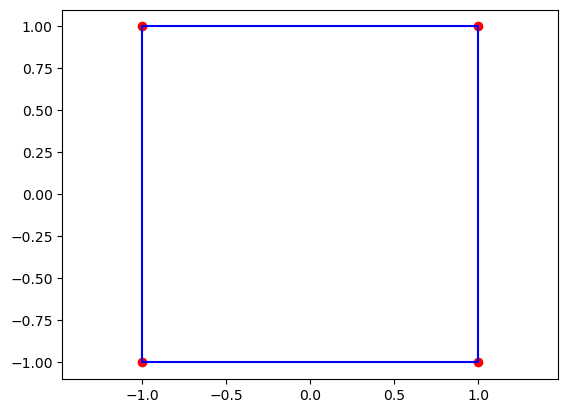

In [12]:
plot_poly(x[:, 0], x[:, 1], 'b')
plt.show()

$w \cdot x + b$ implements an affine transformation (for nonzero $b$):

- a linear transformation ($w$)
- followed by a translation ($b$)

In [13]:
theta = 1
w = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

y = np.zeros([4, 2])
for i in range(len(x)):
    y[i] = np.dot(w, x[i])

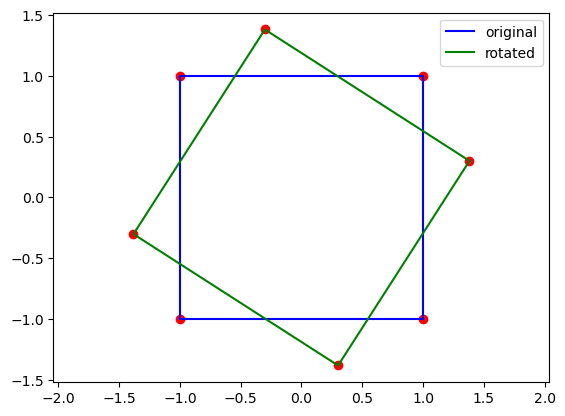

In [14]:
plot_poly(x[:, 0], x[:, 1], 'b', label="original")
plot_poly(y[:, 0], y[:, 1], 'g', label="rotated") # the blue square has been rotated by 1 radian (linear)
plt.legend()
plt.show()

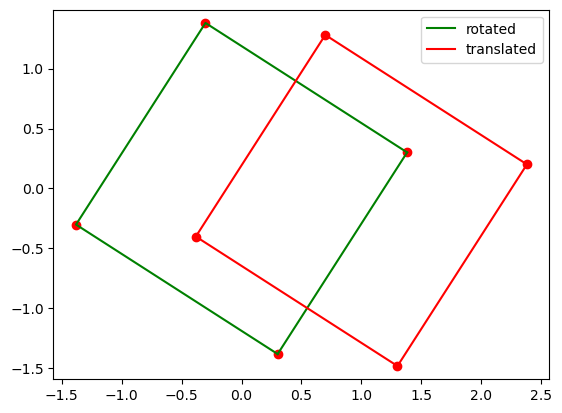

In [15]:
b = np.array([1, -0.1])
z = np.add(y, b)

plot_poly(y[:, 0], y[:, 1], 'g', label="rotated")
plot_poly(z[:, 0], z[:, 1], 'red', label="translated") # translation: affine
plt.legend()
plt.show()

Element-wise application of a nonlinear function to $w \cdot x + b$ will introduce *distortions*.

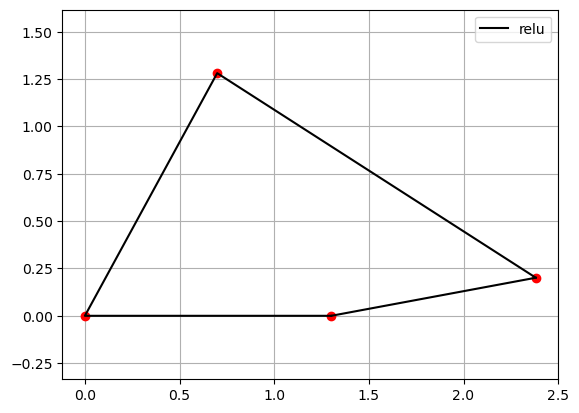

In [19]:
w = tf.nn.relu(z)

plot_poly(w[:, 0], w[:, 1], 'black', label="relu") # distortion
plt.grid()
plt.legend()
plt.show()

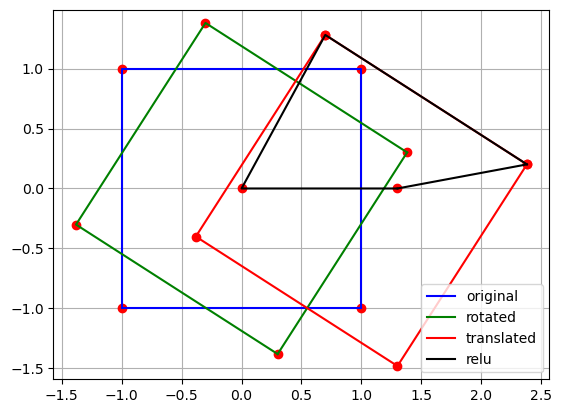

In [20]:
plot_poly(x[:, 0], x[:, 1], 'b', label="original")
plot_poly(y[:, 0], y[:, 1], 'g', label="rotated")
plot_poly(z[:, 0], z[:, 1], 'red', label="translated")
plot_poly(w[:, 0], w[:, 1], 'black', label="relu")
plt.grid()
plt.legend()
plt.show()

### Linear transformations recap & visualisations

For those who want/need a great visual recap, 3Blue1Brown strikes again!

(In case you're bored of these videos, this should the last lecture where we have them!)

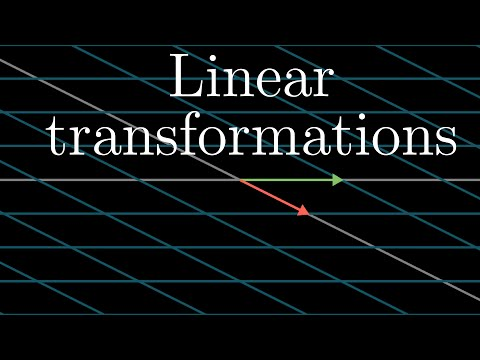

In [4]:
YouTubeVideo('kYB8IZa5AuE', width=853, height=480) # 3Blue1Brown Linear transformations

# Essence of Linear Algebra playlist:
# https://www.youtube.com/watch?v=kYB8IZa5AuE&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab